## **09. Representasi Pengetahuan (Knowledge Representation)**

---


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data_testing = pd.read_csv('sorted_topic_cluster_counts.csv')

In [75]:
#eda dari data_testing jumlah kosa kata dan kata terpanjang pada full_text
print(data_testing['full_text'].str.split().apply(len).describe())



count    1880.000000
mean       18.262766
std        11.283473
min         2.000000
25%        10.000000
50%        15.000000
75%        25.000000
max        54.000000
Name: full_text, dtype: float64


In [76]:
#tampilkan atribut yang ada di data
data_testing.columns

Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'lang', 'location', 'probability', 'quote_count',
       'reply_count', 'retweet_count', 'topic', 'tweet_url', 'user_id_str',
       'username', 'in_reply_to_screen_name', 'image_url', 'context',
       'emotion'],
      dtype='object')

In [77]:
#ubah nama atribut topic_cluster menjadi topic
data_testing.rename(columns={'topic_cluster':'topic'}, inplace=True)

#tambahkan atribut probability = 0
data_testing['probability'] = 0

#tambahkan atribut konteks dengan 0
data_testing['context'] = 0


In [78]:
#tampilkan hanya kolom full_text, topic_cluster, emotion dan username
merged_df = data_testing[['username','full_text','topic', 'emotion']]

merged_df.head(10)

,username,full_text,topic,emotion
0,tigapuluhtigax,TIMNAS PRIA DAN WANITA MENANG + ERIK TEN HAG STAY,1,Joy
1,sotongism,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan #TimnasDay,3,Fear
2,peanutkacang123,2 Sejarah Dicetak Timnas Indonesia Usai Ganyang Filipina STY Pelatih Pemecah Rekor. #TimNasDay https://t.co/nLxTrlEYx5.,3,Joy
3,PKananku1927,@womensfootie_id Tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di Asia,1,Neutral
4,kangsil2012,Timnas Indonesia Vs Timnas Filipina 2-0 Indonesia Lolos ke Putaran Ketiga Kuaifikasi Piala Dunia 2026 https://t.co/if6QFIOQdd #sepakbola #IndonesiaFilipina #kualifikasipialadunia #TimnasIndonesia #TimnasFilipina #pssi,2,Joy
5,refnotrev,@amayzing__ @idextratime antara lu fomo timnas atau emang kaga ngerti sistem pot,8,Fear
6,KimJongUncchhhh,@fahmiiiiii14 @idextratime Beliau ini literally mantan pemain timnas yg beneran orang bola. Lah yg duduk di vip malah artis2 ga jelas. Kesannya kek habis manis sepah dibuang njir,3,Anger
7,joyszeamays,Ternyata jodohnya sama Indo-Philiphine bukan Indo-Irak. Bonus liat perjuangan timnas lolos ke putaran ketiga : ),2,Joy
8,DenSombedt,@StatsRawon Kyok e Malik Rivera ambek glison Costa soale Malik wes mari teko timnas Kari Poto ambk gwe vidio,3,Neutral
9,ilyasaihza_,Sareneng kitu timnas menang? Abi mah bodo amat,4,Neutral


In [79]:
#count emotion
emotion_count = merged_df['emotion'].value_counts()
emotion_count

emotion
Joy        858
Neutral    378
Anger      317
Love       141
Fear       123
Sad         63
Name: count, dtype: int64

Text(0.5, 0, 'Emotion')

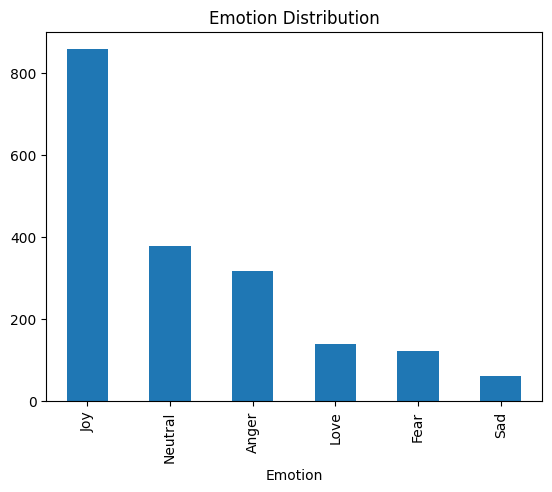

In [80]:
#visualisasikan value_counts dari emotion jadi graph
emotion_count.plot(kind='bar')
plt.title('Emotion Distribution')
plt.xlabel('Emotion')

In [81]:
jumlah_nan = merged_df.isna().sum()

print(jumlah_nan)

username     0
full_text    0
topic        0
emotion      0
dtype: int64


## Knowledge

### Per-Topic

In [82]:
topic_cluster_counts = merged_df['topic'].value_counts().reset_index()
topic_cluster_counts

,topic,count
0,3,351
1,0,335
2,1,292
3,2,264
4,4,243
5,5,157
6,7,84
7,8,76
8,9,54
9,6,24


<Axes: xlabel='emotion', ylabel='count'>

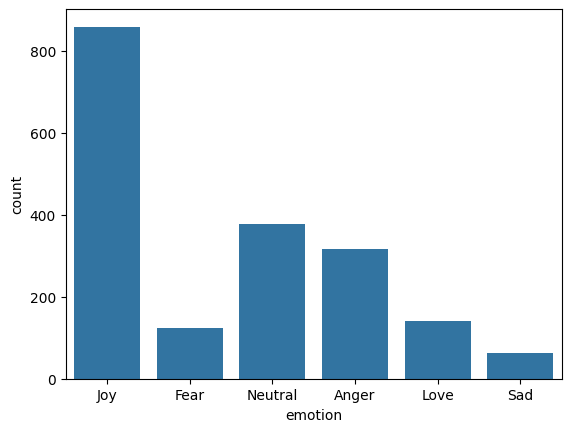

In [83]:
#tampilkan semua data tanpa melihat topic
sns.countplot(x='emotion', data=merged_df)

In [84]:
topik_ke = 3

topic_cluster_0_df = merged_df[merged_df['topic'] == topik_ke]
topic_cluster_0_df = topic_cluster_0_df.sort_values(by='emotion', ascending=True)

count_emotion = topic_cluster_0_df['emotion'].value_counts().reset_index()
count_emotion

,emotion,count
0,Anger,167
1,Joy,109
2,Neutral,43
3,Fear,12
4,Love,10
5,Sad,10


<Axes: xlabel='emotion', ylabel='count'>

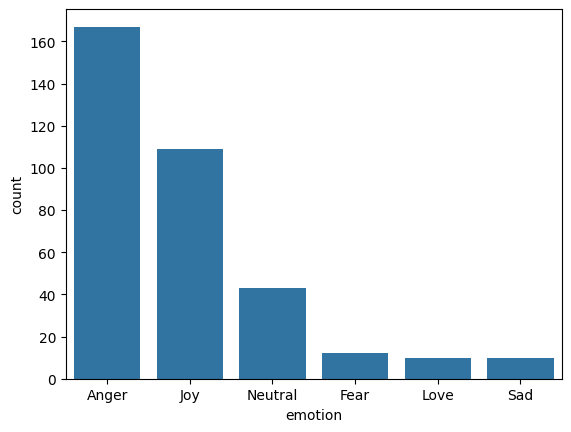

In [85]:
sns.barplot(x='emotion', y='count', data=count_emotion)


In [86]:
topic_cluster_0_df = topic_cluster_0_df.sort_values(by='emotion', ascending=False)


#tampilkan semuanya di output jangan dibatasi
pd.set_option('display.max_rows', None)
topic_cluster_0_df.head(10)


,username,full_text,topic,emotion
329,0852_3195,Sejarah yang bisa dibanggakan itu kalo pemain timnas seluruhnya pemain lokal bukan mayoritas naturalisasi. Dari semua bidang yang ada di Indonesia hampir semuanya dikuasai orang asing salah satunya sepakbola https://t.co/Xu6GVOtfgo,3,Sad
204,akunbotok,@realmadridindo1 Kasian yaa update statistiknya cuma bisa di timnas yg main aja paling 2 bulan sekali wkwkw. Mau update di klub gabisa soalnya ampas,3,Sad
263,IvanMustopa21,@nocontextpersib Persib ga suka timnas kali ya? Semua aja di akuin,3,Sad
294,sidiq90s,@rihanurduni @MAYT_Media Lagian ngapa mau jg nyanyi after match ? Keliatan dia ga pernah liat timnas ketika game selesai para pemain melingkar di tengah lapang menyanyikan anthem indonesia pusaka bersama suporter,3,Sad
211,dheshooo,Knp vibe menangnya persib lebih lebih dr timnas??!! Masih gk ngrti,3,Sad
356,FredArizona,Kalo mau ke Milan brarti udh putus asa masuk timnas,3,Sad
341,dahlaheriaja,@dwinucleo alasan gasuka timnas ya gini. apa serba di jakarta. karena keseringan di jakarta ampe penduduk lokal se akan akan nge claim kalo timnas itu milik mereka,3,Sad
191,seuppie,ajggg gara2 timnas main smlm kirain udh hari jumat,3,Sad
474,Teguran3,@idextratime @bliblidotcom Dulu pencapaian terbaik nonton timnas pas final AFF lawan Malaysia dan optimis menang karena di fase group menang 5-1 tapi kalah di final nyesek banget,3,Sad
455,cipanyanana,gue jadi kepikiran sama orang ini gegara dia bikin story lagi nonton timnas kaya anjirrrr dulu kita sedeket ini tapi gegara kecerobohan gua dan kegasadar dirian gua namanya masih anak SMA gua jadi jauh sama ini orang wkwkwk,3,Sad


In [87]:
#ukuran kolom jangan dibatasi untuk full_text
pd.set_option('display.max_colwidth', None)

#tampilkan hanya emosi anger
topic_cluster_0_df[topic_cluster_0_df['emotion'] == 'Anger'].head(10)

,username,full_text,topic,emotion
884,ulfabinada,Namanya hidup itu kaya orang ngamen kadang baru nyanyi satu kalimat dapat 1000 kadang belum nyanyi dikasih 5000 kadang dibilang prei mas kadang juga dihujat ky mas Anang yg ngerusak suasana #TimnasDay,3,Anger
377,vkwmflf,@pra_dypta @Indostransfer dikibulin pssi kah emtek 75 miliar ini wakakakaka cman bs nayangin timnas kelompok umur,3,Anger
398,edvan_p,@00beinghuman @SCTV @Indosiar D rusak sama anang pas FT yg harusnya momen supporter ama timnas dgn lagu Indonesia pusaka bagimu negeri dan garuda clap.,3,Anger
387,RestuRagil15578,@UpdateBolabola Bgst lah. Mana vision + berbayarnya jg geje. Udah beli paket sport eh timnas main harus beli lagi,3,Anger
347,arjunapemanah24,@GIBOLofficial Ini anang yang dulu main di Persebaya kan? Mantan pemain timnas juga to?,3,Anger
312,arthrw_,selain doa timnas ben menang pemain e sehat kabeh fans e ra aneh2 do berdoa o ben ra pernah segrup meneh mbi qatar asu,3,Anger
376,kayarayaaaaa,@revengeeeee_ @idextratime @bliblidotcom Yg ada timnas kita yg mampus. Mereka curang bgt. Lawan India aja curang.,3,Anger
1847,fajardwipermadi,Lagu indonesia Pusaka yg di tungguin eh malah ada yg pengen karaoke.... Duh mas Anang...Mas Anang #TimNasDay,3,Anger
427,faisalamar_11,@UpdateBolabola Lha terus emtek bayar mahal hak siar timnas nyiarin apa dong,3,Anger
419,katasiapalo,Saya sebagai tidak menonton timnas semalem tidak tahu apa yg mesti dikatakan terkait performa mas Anang and friends.,3,Anger


# Konten Tentang Timnas Indonesia di Vidio

## 1. Dukungan Penggemar untuk Timnas Indonesia (Joy)
**Konten Senang**: Video yang menyoroti dukungan penuh dari para penggemar untuk Timnas Indonesia, termasuk ucapan selamat dan sorak-sorai setelah kemenangan dalam berbagai pertandingan.

**Contoh Tweet**:
> Dukungan luar biasa dari penggemar untuk Timnas Indonesia! 🎉 Saksikan momen-momen kegembiraan dan ucapan selamat untuk para pemain. #DukungTimnas [link video]

## 2. Perjalanan Timnas Indonesia di Babak Kualifikasi Piala Dunia dan Piala Asia (Joy)
**Konten Senang**: Video rekapitulasi perjalanan Timnas Indonesia di babak kualifikasi, termasuk momen-momen penting dan wawancara dengan pemain serta pelatih.

**Contoh Tweet**:
> Timnas Indonesia tampil impresif di kualifikasi Piala Dunia dan Piala Asia! 🎉 Saksikan rekap perjalanan mereka dan wawancara eksklusif. #TimnasKualifikasi [link video]

## 3. Keberhasilan Timnas Indonesia Lolos ke Putaran Ketiga Kualifikasi Piala Dunia 2026 (Joy)
**Konten Senang**: Cuplikan video dari momen-momen gol dan selebrasi pemain serta fans. Kutipan inspiratif dari pelatih dan pemain tentang perjalanan mereka menuju kualifikasi.

**Contoh Tweet**:
> Timnas Indonesia lolos ke putaran ketiga kualifikasi Piala Dunia 2026! 🎊 Saksikan momen-momen terbaik dan kegembiraan para pemain dan fans! #TimnasLolos [link video]

## 4. Penampilan Anang Menyanyikan "Indonesia Pusaka" Sebelum Pertandingan (Anger)
**Konten Marah**: Video atau artikel yang membahas reaksi emosional penggemar terhadap penampilan Anang menyanyikan "Indonesia Pusaka" sebelum pertandingan, dengan fokus pada kontroversi dan pendapat yang beragam.

**Contoh Tweet**:
> Penampilan Anang menyanyikan "Indonesia Pusaka" sebelum pertandingan menimbulkan berbagai reaksi. Apa pendapat kalian? #IndonesiaPusaka [link video]

## 5. Performa Thom Haye dan Verdonk di lapangan saat bersama timnas(Love)
**Konten Cinta**: Video reaksi penggemar yang menunjukkan dukungan dan kasih sayang mereka kepada pemain seperti Verdonk dan Haye. Testimoni dari fans tentang kecintaan mereka pada pemain dan tim.

**Contoh Tweet**:
> Dukungan luar biasa dari penggemar untuk Verdonk dan Haye! ❤️ Saksikan reaksi dan testimoni mereka tentang kecintaan pada Timnas Indonesia. #LoveForTimnas [link video]

## 6. Momen Bersejarah dan Gol Penting Timnas Indonesia (Joy)
**Konten Senang**: Cuplikan video dari momen-momen bersejarah dan gol-gol penting yang dicetak oleh Timnas Indonesia dalam babak kualifikasi dan turnamen AFF.

**Contoh Tweet**:
> Gol-gol bersejarah dari Timnas Indonesia di babak kualifikasi dan turnamen AFF! 🎊 Saksikan momen-momen terbaik di sini. #TimnasGol [link video]

## 7. Kondisi Rumput di Stadion Gelora Bung Karno Setelah Konser (Fear)
**Konten Takut**: Video yang menunjukkan kondisi rumput di Stadion Gelora Bung Karno setelah konser, dengan sorotan pada keluhan penggemar mengenai dampaknya pada performa timnas Indonesia di lapangan.

**Contoh Tweet**:
> Lihat kondisi rumput Stadion Gelora Bung Karno setelah konser dan bagaimana ini memengaruhi performa timnas Indonesia. #GBKRumput [link video]

## 8. Diskusi Strategi Pelatih Shin Tae-yong dan Potensi Pemain Diaspora (Joy)
**Konten Senang**: Video yang menyoroti strategi pelatih Shin Tae-yong dan performa pemain seperti Ernando dan Verdonk, termasuk diskusi tentang potensi pemain diaspora untuk memperkuat timnas.

**Contoh Tweet**:
> Lihat bagaimana strategi Shin Tae-yong membawa Timnas Indonesia ke puncak! 🎉 Diskusi tentang pemain diaspora dan potensi mereka di sini. 💪🇮🇩 [link video]

## 9. Kondisi Lapangan dan Performa Pemain di Berbagai Pertandingan (Fear)
**Konten Takut**: Video yang menunjukkan kondisi lapangan yang kurang baik dan dampaknya pada performa pemain Timnas Indonesia di berbagai pertandingan.

**Contoh Tweet**:
> Kondisi lapangan yang kurang baik memengaruhi performa pemain Timnas Indonesia. Lihat bagaimana ini berdampak pada pertandingan. #KondisiLapangan [link video]

## 10. Pengalaman Penggemar Menonton Pertandingan Timnas Indonesia (Fear)
**Konten Takut**: Video yang menunjukkan pengalaman penggemar saat menonton pertandingan timnas, dengan fokus pada momen-momen penting dan rasa takut akan ketinggalan (FOMO).

**Contoh Tweet**:
> Banyak yang merasa FOMO karena tidak bisa menonton langsung Timnas. 😢 Simak cerita mereka dan dukung Timnas dari rumah! #FOMOTimnas [link video]